**LAB-09:MLP Classifier**

---



* Created Date: 19.04.2024
* Created By: Blessy Louis(2348416)
* edited on: 19.04.2024

#Importing the necessary packages and libaries


1. **sklearn.metrics.confusion_matrix**: This library provides functionality to compute confusion matrix to evaluate the accuracy of a classification.

2. **sklearn.model_selection.train_test_split**: This library is used to split the dataset into training and testing sets. It's commonly used to assess the performance of a machine learning model.

3. **sklearn.svm**: This is the Support Vector Machines (SVM) implementation in scikit-learn, a popular machine learning library in Python. It provides implementations of SVM algorithms for classification and regression tasks.

4. **sklearn.metrics.f1_score**: This library provides functionality to compute the F1 score, which is the harmonic mean of precision and recall. It's commonly used as a performance metric for classification problems.

5. **matplotlib.pyplot**: Matplotlib is a plotting library for Python. `pyplot` is a subpackage of Matplotlib that provides a MATLAB-like interface for creating plots and visualizations.

6. **numpy**: NumPy is a fundamental package for scientific computing in Python. It provides support for multi-dimensional arrays and matrices, along with a large collection of mathematical functions.

7. **pandas**: Pandas is a powerful library for data manipulation and analysis in Python. It provides data structures and functions to work with structured data efficiently, primarily in the form of DataFrame objects.

8. **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In summary, these libraries are essential tools for performing machine learning tasks, including data manipulation, model training, evaluation, and visualization. They offer a wide range of functionalities to streamline the machine learning workflow and facilitate the analysis of data and models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

The food inspection department conducts regular inspection on food quality for various restaurants in the city. It’s a very well documented procedure and over time some good amount of data has been generated out of these inspections.



Here you are provided with a subset of this dataset with information on food quality checks conducted on thousands of facilities that serve food across multiple cities. Your objective as a Data Scientist is to predict whether a facility will pass or fail the inspection based on a number of factors.


#**Features:**
* ID: A unique id for each inspection
* Date: The date at which the inspection was done in a particular facility
* LicenseNo: De-identified license number for a particular facility
* FacilityID: De-identified unique facility id for a facility
* FacilityName: The encoded name of a facility
* Type: The type of the facility being inspected
* Street: The encoded street where the facility is located
* City: The encoded city where the facility is located
* State: The encoded state where the * * facility is located
* LocationID: An encoded location feature.
* Reason: The primary reason for the inspection
* SectionViolations: Laws violated by the facility
* RiskLevel: The level of risk the facility possesses to the consumers.
* Geo_Loc: De-identified geo location of the facility
* Inspection_Results: The result of the inspection

Target:
The inspection results can have any of the following values :
0:’FACILITY CHANGED’
1:’FAIL’
2:’FURTHER INSPECTION REQUIRED’,
3:’INSPECTION OVERRULED’
4:’PASS’
5:’PASS(CONDITIONAL)’
6:’SHUT-DOWN’

In [ ]:
df=pd.read_csv('Data_Train.csv')

# **EDA**

**Displaying first 5 rows of the dataset**

In [ ]:
df.head()

ID        Date  LicenseNo  FacilityID  FacilityName  \
0  3.110350e+13  26-04-2010       4744        8123          7715   
1  1.008900e+13  21-06-2009       2973       12268         11664   
2  4.014900e+13  01-05-2013      18223        1112           969   
3  3.715770e+13  28-09-2015      20825       20007         19115   
4  4.747800e+13  09-12-2015       2136       16867         10409   

            Type  Street         City       State  LocationID  \
0     RESTAURANT   15522  id-11235901  id_1890134     81876.0   
1  GROCERY STORE    3057  id-11235901  id_1890134     81862.0   
2     RESTAURANT   14988  id-11235901  id_1890134     81883.0   
3     RESTAURANT    3661  id-11235901  id_1890134     81859.0   
4     RESTAURANT    7876  id-11235901  id_1890134     81886.0   

                  Reason  SectionViolations RiskLevel     Geo_Loc  \
0                CANVASS               33.0      High  locid16406   
1              COMPLAINT               33.0      High    locid878   
2                CANVASS                NaN      High   locid3368   
3  CANVASS RE-INSPECTION               31.0    Medium  locid11839   
4              COMPLAINT               30.0      High  locid12264   

   Inspection_Results  
0                   4  
1                   4  
2                   6  
3                   4  
4                   4

the  dataset is related to inspections of facilities, possibly restaurants, with various features describing each inspection.
1. **ID**: Unique identifier for each inspection.
2. **Date**: Date of the inspection.
3. **LicenseNo**: License number associated with the facility.
4. **FacilityID**: ID of the facility being inspected.
5. **FacilityName**: Name of the facility being inspected.
6. **Type**: Type of facility (e.g., restaurant).
7. **Street**: Street address of the facility.
8. **City**: City where the facility is located.
9. **State**: State where the facility is located.
10. **LocationID**: ID associated with the location of the facility.
11. **Reason**: Reason for the inspection (e.g., CANVASS).
12. **SectionViolations**: Number associated with section violations during the inspection.
13. **RiskLevel**: Level of risk associated with the facility (e.g., High).
14. **Geo_Loc**: Geographic location data.
15. **Inspection_Results**: Result of the inspection (e.g., 4).

In [ ]:
df.shape

(147443, 15)

clearly the dataset has 147443 rows and 15 columns

**Data Description: Features in the data**

In [ ]:
df.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

**Checking for null values**

In [ ]:
df.isnull().sum()

ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
dtype: int64

Cleafrly we see that columns like  Type and SectionViolations have null values around 3485 and 39068 respectively

In [ ]:
# For numerical columns
df['SectionViolations'].fillna(df['SectionViolations'].median(), inplace=True)

# For categorical columns
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['LocationID'].fillna(df['LocationID'].mode()[0], inplace=True)


**Displaying the information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147443 non-null  float64
 1   Date                147443 non-null  object 
 2   LicenseNo           147443 non-null  int64  
 3   FacilityID          147443 non-null  int64  
 4   FacilityName        147443 non-null  int64  
 5   Type                147443 non-null  object 
 6   Street              147443 non-null  int64  
 7   City                147443 non-null  object 
 8   State               147443 non-null  object 
 9   LocationID          147443 non-null  float64
 10  Reason              147443 non-null  object 
 11  SectionViolations   147443 non-null  float64
 12  RiskLevel           147443 non-null  object 
 13  Geo_Loc             147443 non-null  object 
 14  Inspection_Results  147443 non-null  int64  
dtypes: float64(3), int64(5), object(7)



- The dataset contains 147,443 entries and 15 columns.
- The columns are as follows:
    1. ID: Unique identifier for each inspection (float64).
    2. Date: Date of the inspection (object).
    3. LicenseNo: License number associated with the facility (int64).
    4. FacilityID: ID of the facility being inspected (int64).
    5. FacilityName: Name of the facility being inspected (int64).
    6. Type: Type of facility (object).
    7. Street: Street address of the facility (int64).
    8. City: City where the facility is located (object).
    9. State: State where the facility is located (object).
    10. LocationID: ID associated with the location of the facility (float64).
    11. Reason: Reason for the inspection (object).
    12. SectionViolations: Number associated with section violations during the inspection (float64).
    13. RiskLevel: Level of risk associated with the facility (object).
    14. Geo_Loc: Geographic location data (object).
    15. Inspection_Results: Result of the inspection (int64).

It appears that there are no null values in the dataset, as indicated by the "Non-Null Count" values for each column. The memory usage of the DataFrame is approximately 16.9 MB.



### **Univariate Analysis**

Numerical Variables:

In [ ]:
df.describe()

ID      LicenseNo     FacilityID   FacilityName  \
count  1.474430e+05  147443.000000  147443.000000  147443.000000   
mean   2.997142e+13   17726.613003   14020.779583   13377.891009   
std    1.154808e+13   10865.050018    7794.382869    7408.148606   
min    1.000010e+13       0.000000       0.000000       0.000000   
25%    1.994860e+13    8588.000000    7347.000000    6993.000000   
50%    2.999150e+13   17056.000000   14256.000000   13710.000000   
75%    3.995725e+13   26163.000000   20841.000000   19795.000000   
max    4.999990e+13   37394.000000   27276.000000   26032.000000   

              Street     LocationID  SectionViolations  Inspection_Results  
count  147443.000000  147443.000000      147443.000000       147443.000000  
mean     8684.119653   81873.638681          25.949723            3.680405  
std      5255.991577     140.232380          11.267393            1.481441  
min         0.000000   31259.000000           1.000000            0.000000  
25%      4109.000000   81859.000000          18.000000            4.000000  
50%      8541.000000   81870.000000          31.000000            4.000000  
75%     13321.000000   81888.000000          32.000000            4.000000  
max     17891.000000   82072.000000          70.000000            6.000000

  **Visualize distribution of different numerical data**

In [ ]:
ins_res_freq = df['Inspection_Results'].value_counts(normalize=True)
print(ins_res_freq)

Inspection_Results
4    0.538873
1    0.192997
5    0.139925
6    0.086074
3    0.032195
2    0.009631
0    0.000305
Name: proportion, dtype: float64


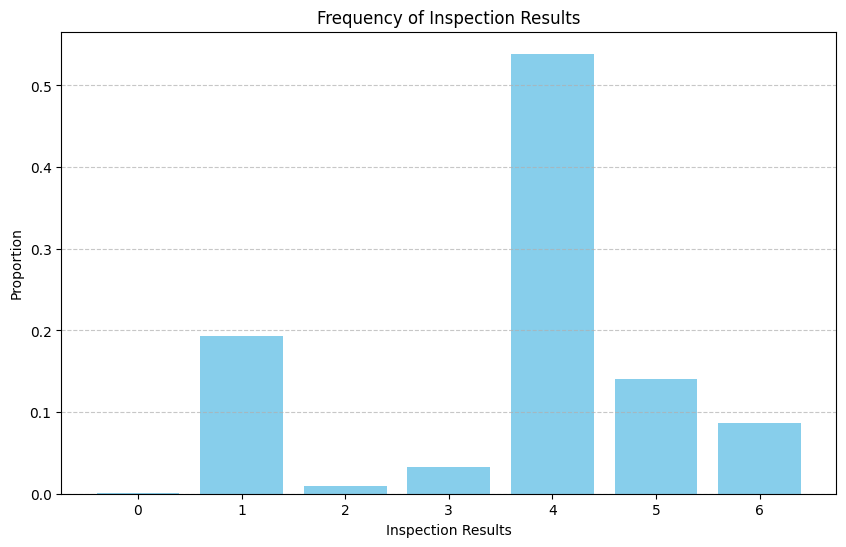

In [ ]:
import matplotlib.pyplot as plt

# Frequency table data
inspection_results = [4, 1, 5, 6, 3, 2, 0]  # Inspection results
proportions = [0.538873, 0.192997, 0.139925, 0.086074, 0.032195, 0.009631, 0.000305]  # Proportions

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(inspection_results, proportions, color='skyblue')
plt.title('Frequency of Inspection Results')
plt.xlabel('Inspection Results')
plt.ylabel('Proportion')
plt.xticks(inspection_results)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 Clearly we see that  the most occurrence is score 4 with a frequency of 0.54 followed by 1 with a probability of 0.192 and the least is score 0 with approximately 0 occurences

### **Univariate Analysis**

Categorical Variables:

In [ ]:
risk_freq = df['RiskLevel'].value_counts(normalize=True)
print(risk_freq)

RiskLevel
High         0.717470
Medium       0.195357
Low          0.087030
Uncertain    0.000142
Name: proportion, dtype: float64


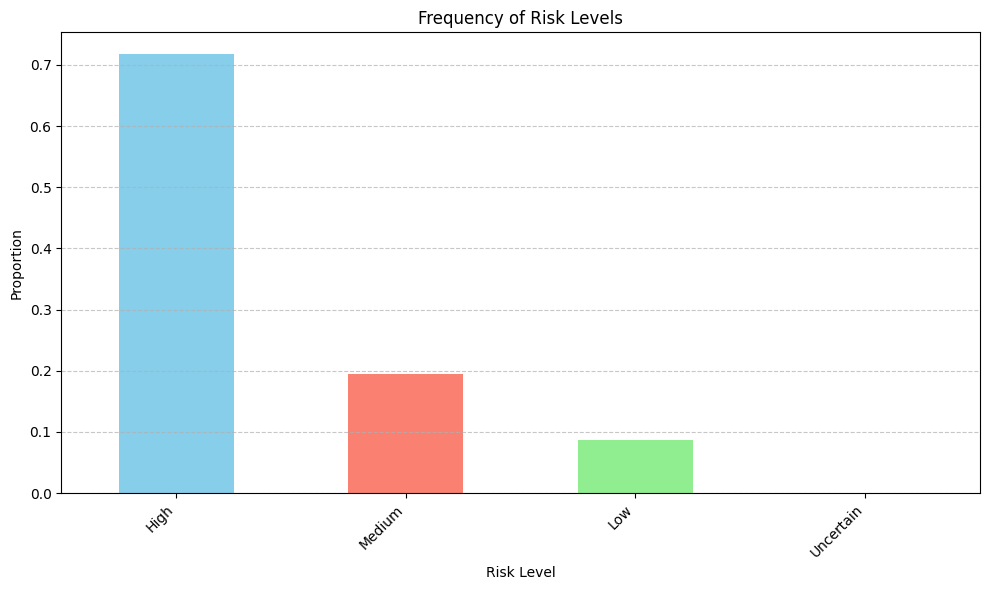

In [ ]:
# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plotting
plt.figure(figsize=(10, 6))
risk_freq.plot(kind='bar', color=colors)
plt.title('Frequency of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 This graph depicts the occurence of  different risk levels in the dataset , The risk level measure High with highest occurences  and the lowest being the uncertain measure

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

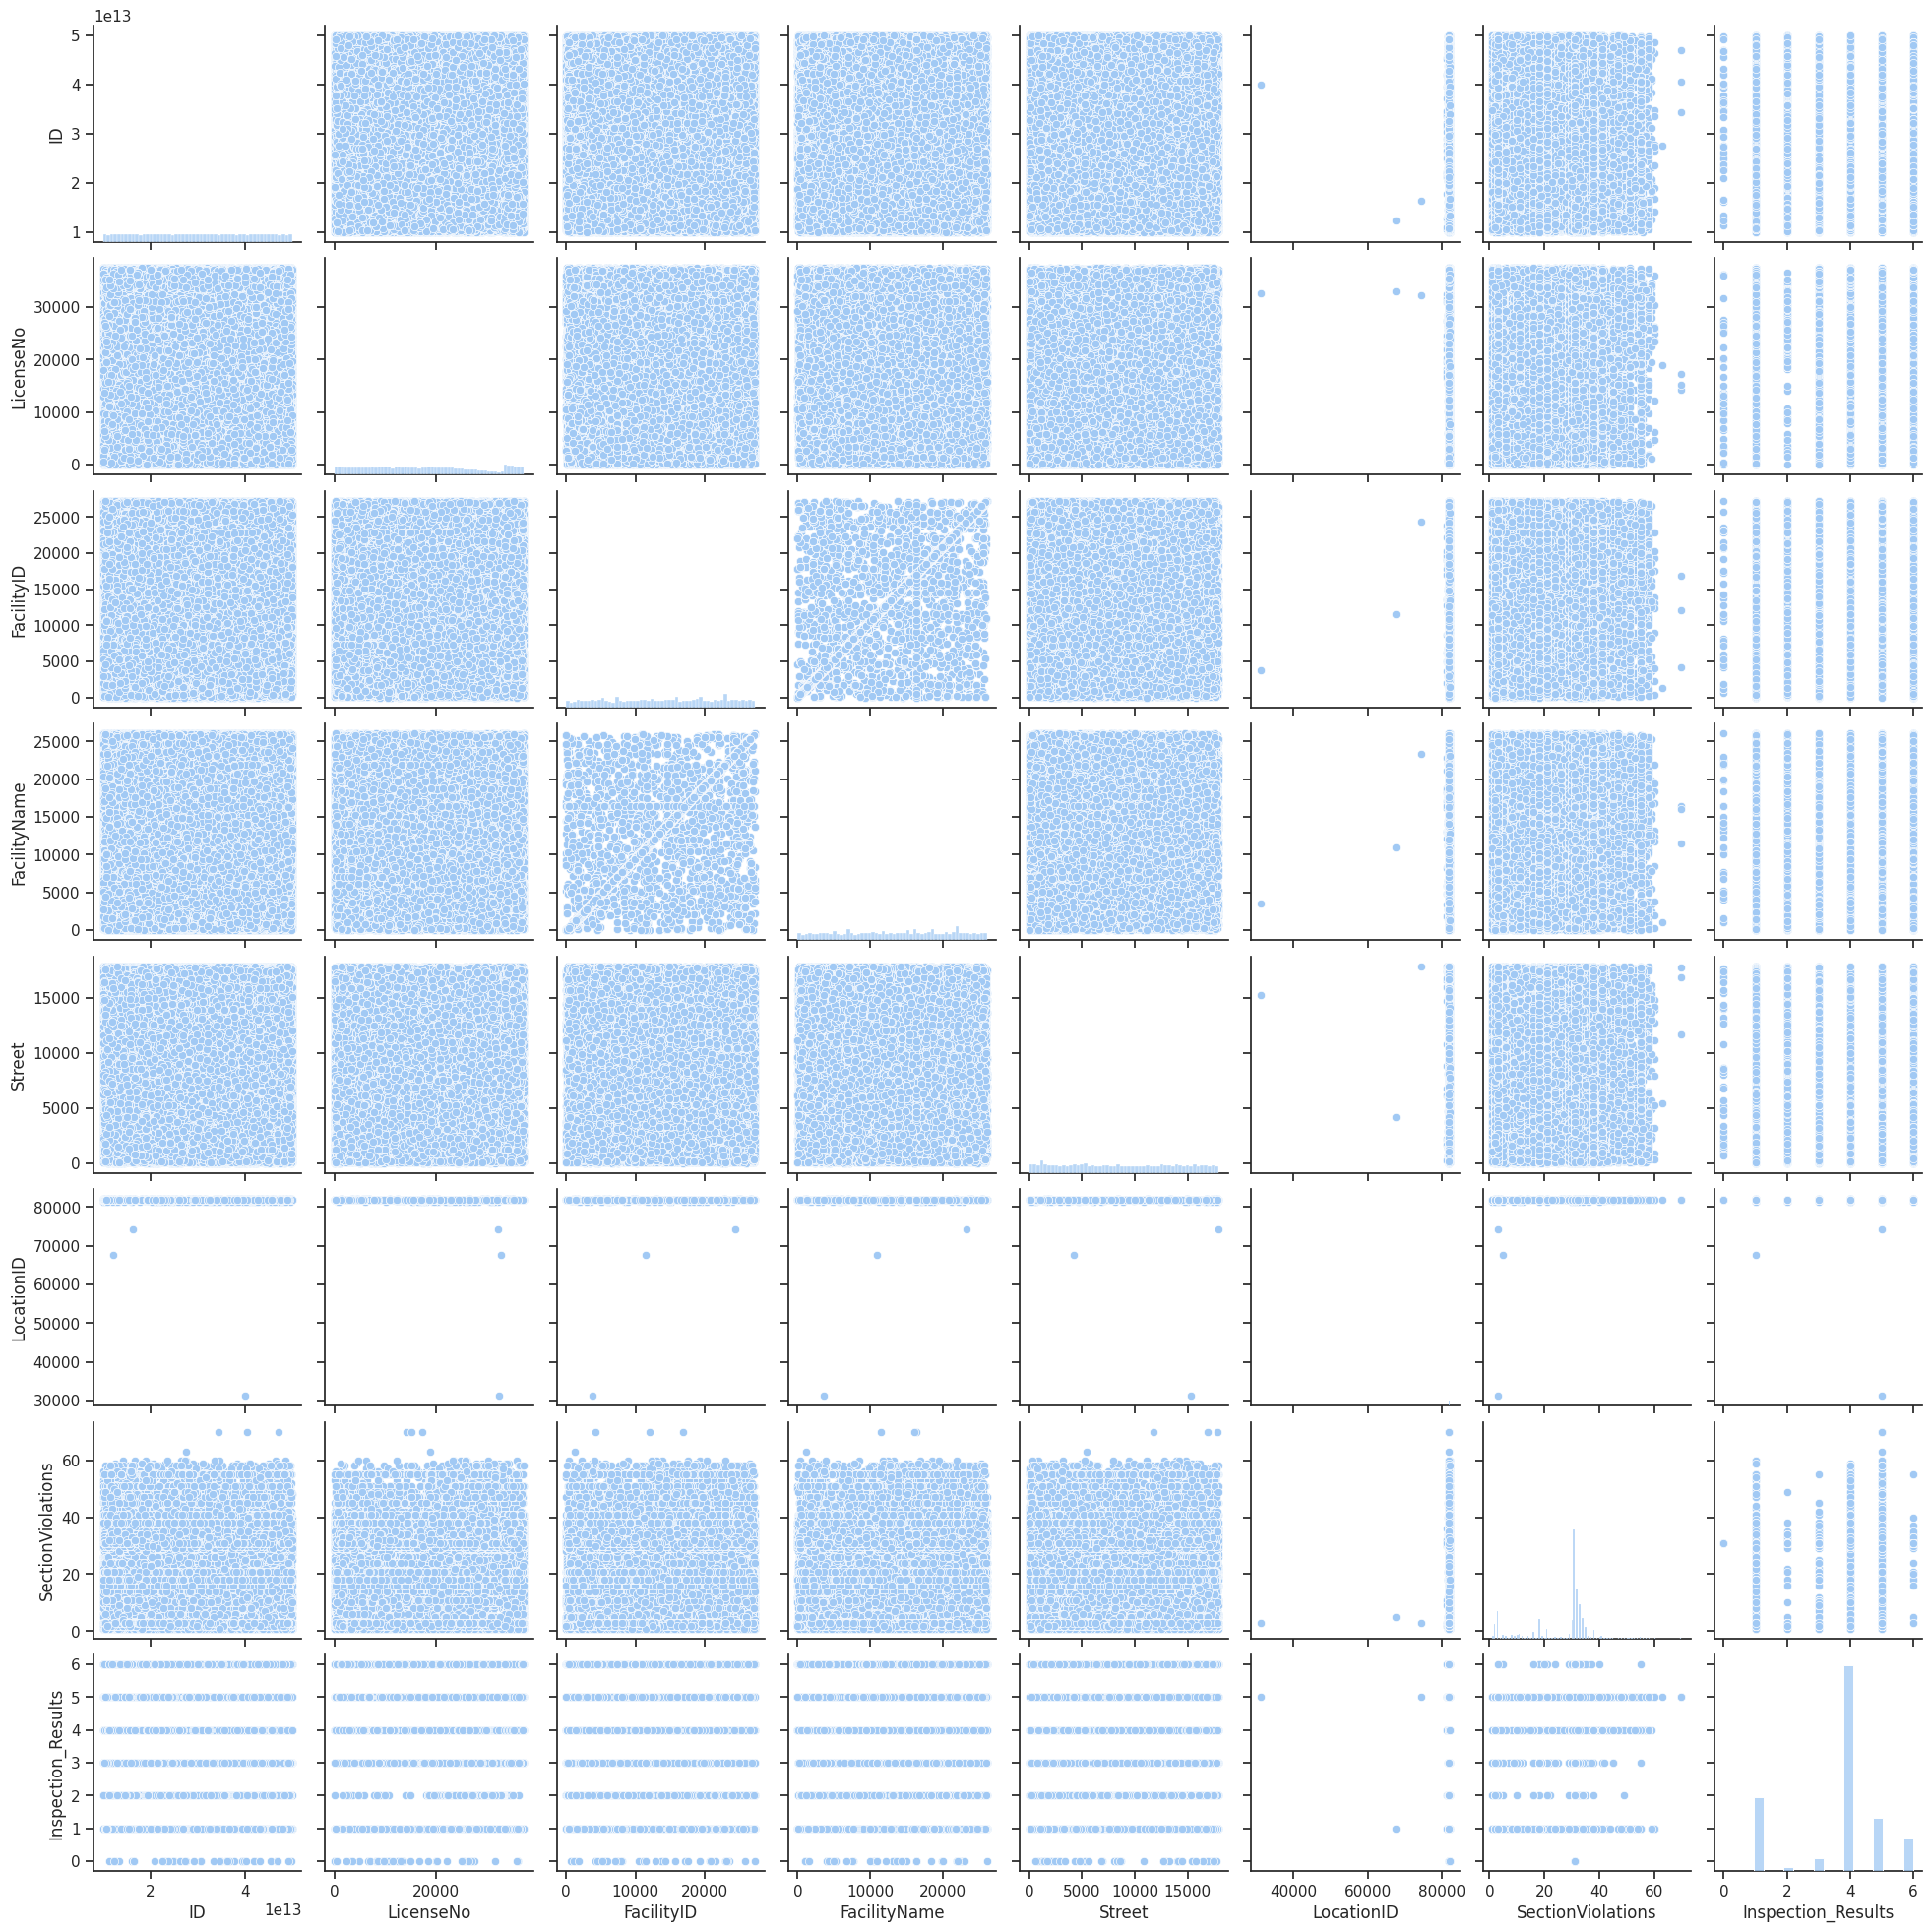

In [ ]:
sns.set(style="ticks", palette="pastel")
sns.pairplot(df)
plt.show()

 From the above pair plot we see that none of the features are linearly related to one another .

In [ ]:
subset = df[['SectionViolations', 'Inspection_Results']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    SectionViolations  Inspection_Results
SectionViolations            1.000000            0.268461
Inspection_Results           0.268461            1.000000


The correlation matrix you provided shows the correlation coefficients between the 'SectionViolations' feature and the 'Inspection_Results' target variable.



1. **SectionViolations vs. SectionViolations**: This is the correlation of 'SectionViolations' with itself, which will always be 1. It indicates the perfect correlation between the feature and itself, which is obvious since it's the same variable.

2. **Inspection_Results vs. Inspection_Results**: Similarly, this is the correlation of 'Inspection_Results' with itself, which will always be 1. Again, it indicates the perfect correlation between the target variable and itself.

3. **SectionViolations vs. Inspection_Results**: This is the correlation coefficient between 'SectionViolations' and 'Inspection_Results'. In this case, the correlation coefficient is approximately 0.268461.

   - A positive correlation indicates that as the number of section violations increases, the inspection result tends to be higher (closer to 'Pass' or 'Pass (Conditional)'). However, the correlation coefficient of 0.268461 suggests a relatively weak positive correlation, meaning the relationship between these two variables is not very strong.



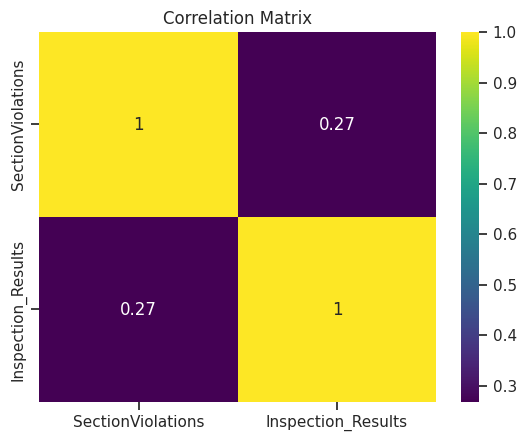

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In summary, the correlation matrix shows that there is a weak positive correlation between the number of section violations and the inspection results. This means that as the number of section violations increases, the likelihood of a higher inspection result (such as 'Pass') also tends to increase, but the relationship is not very strong.

Function to  preprocesses the data and add the target value

In [ ]:
def map_inspection_results(result):
    if result == 0:
        return 'FACILITY CHANGED'
    elif result == 1:
        return 'FAIL'
    elif result == 2:
        return 'FURTHER INSPECTION REQUIRED'
    elif result == 3:
        return 'INSPECTION OVERRULED'
    elif result == 4:
        return 'PASS'
    elif result == 5:
        return 'PASS(CONDITIONAL)'
    elif result == 6:
        return 'SHUT-DOWN'
    else:
        return 'Unknown'  # Handle any other values not specified

# Apply the function to create a new column 'Target'
df['Target'] = df['Inspection_Results'].apply(map_inspection_results)


# **MLP**

Selecting the dependent variables and the target value

In [ ]:
X=df[['SectionViolations','Inspection_Results']]
y=df['Target']

Standarizing the input values

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features to standardize
X = df[['SectionViolations', 'Inspection_Results']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

In [45]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

* hidden_layer_sizes: it is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.

* learning_rate_init: It used to controls the step-size in updating the weights.

* activation: Activation function for the hidden layer. Examples, identity, logistic, tanh, and relu. by default, relu is used as an activation function.

* random_state: It defines the random number for weights and bias initialization.

* verbose: It used to print progress messages to standard output.

In [46]:
clf.fit(X_train,y_train)

Iteration 1, loss = 0.37135394
Iteration 2, loss = 0.05222955
Iteration 3, loss = 0.02604356
Iteration 4, loss = 0.01499485
Iteration 5, loss = 0.00949389
Iteration 6, loss = 0.00749816
Iteration 7, loss = 0.00583054
Iteration 8, loss = 0.00466741
Iteration 9, loss = 0.03434265
Iteration 10, loss = 0.00323359
Iteration 11, loss = 0.00249410
Iteration 12, loss = 0.00171050
Iteration 13, loss = 0.00131457
Iteration 14, loss = 0.00072327
Iteration 15, loss = 0.00049903
Iteration 16, loss = 0.00038919
Iteration 17, loss = 0.00028332
Iteration 18, loss = 0.00024420
Iteration 19, loss = 0.00019198
Iteration 20, loss = 0.00014107
Iteration 21, loss = 0.00012513
Iteration 22, loss = 0.00012084
Iteration 23, loss = 0.00010864
Iteration 24, loss = 0.00011162
Iteration 25, loss = 0.05277934
Iteration 26, loss = 0.00042679
Iteration 27, loss = 0.00028889
Iteration 28, loss = 0.00021423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [47]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn import metrics

# Calcuate accuracy
print("Accuracy:", '%.2f'%(metrics.accuracy_score(y_test,ypred)*100), "%")
from sklearn import metrics

# Model Precision
precision = metrics.precision_score(y_test, ypred, average=None)

# Print precision for each class
for i, cls in enumerate(precision):
    print(f"Precision for class {i}: {'%.2f'%(cls*100)} %")


from sklearn.metrics import recall_score

# Model Recall
recall = recall_score(y_test, ypred, average=None)

# Print recall for each class
for i, cls in enumerate(recall):
    print(f"Recall for class {i}: {'%.2f'%(cls*100)} %")


Accuracy: 100.00 %
Precision for class 0: 100.00 %
Precision for class 1: 100.00 %
Precision for class 2: 100.00 %
Precision for class 3: 100.00 %
Precision for class 4: 100.00 %
Precision for class 5: 100.00 %
Precision for class 6: 100.00 %
Recall for class 0: 100.00 %
Recall for class 1: 100.00 %
Recall for class 2: 100.00 %
Recall for class 3: 100.00 %
Recall for class 4: 100.00 %
Recall for class 5: 100.00 %
Recall for class 6: 100.00 %


# **Conclusion**
- **Accuracy**: Accuracy measures the overall correctness of the model across all classes. In this case, the model correctly predicted all instances for each class, resulting in an accuracy of 100%. However, it's essential to ensure that this high accuracy is not due to overfitting or other issues in the model.

- **Precision**: Precision measures the proportion of true positive predictions among all positive predictions for each class. A precision of 100% means that all positive predictions made by the model for each class were correct. In other words, there were no false positives for any class.

- **Recall**: Recall, also known as sensitivity, measures the proportion of true positives correctly identified by the model out of all actual positives for each class. A recall of 100% means that the model correctly identified all actual positives for each class, indicating that there were no false negatives.

In summary, achieving 100% accuracy, precision, and recall for each class suggests that the model performed exceptionally well on the test data. However, it's crucial to validate these results thoroughly, considering the possibility of data leakage, overfitting, or other issues in the modeling process. Additionally, examining other evaluation metrics and exploring the model's behavior on unseen data can provide further insights into its performance.